<a href="https://colab.research.google.com/github/sardarmonsoorsait/housepriceprediction/blob/main/housepriceprediction_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_train ="/content/drive/My Drive/house_price_data/train.csv" 
path_test = "/content/drive/My Drive/house_price_data/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [66]:
df_train.isnull().sum().sum()

6965

In [3]:
num_clm = df_train.select_dtypes(exclude=['object']).keys()
num_clm

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [67]:
df_train[num_clm].isnull().sum().sum()

348

In [70]:
for clm  in num_clm:
  df_train[clm] = df_train[clm].fillna(df_train[clm].mean())

In [71]:
df_train[num_clm].isnull().sum().sum()

0

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

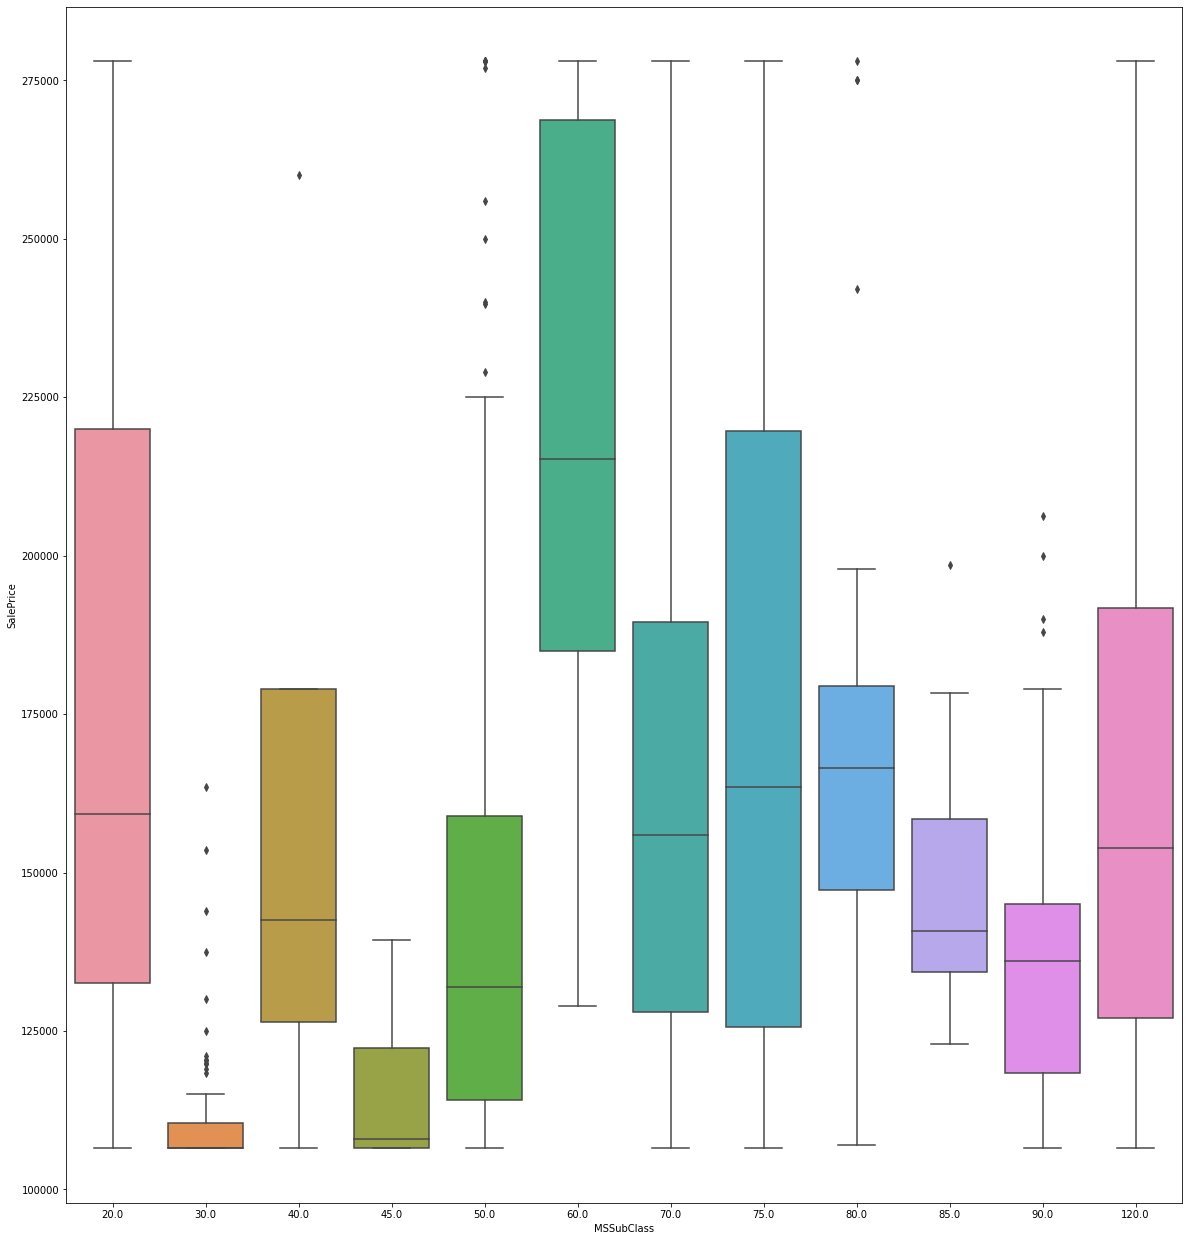

In [83]:

plt.figure(figsize=(20,22))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df_train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


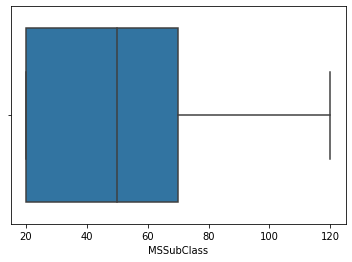

In [84]:
sns.boxplot(df_train['MSSubClass'])

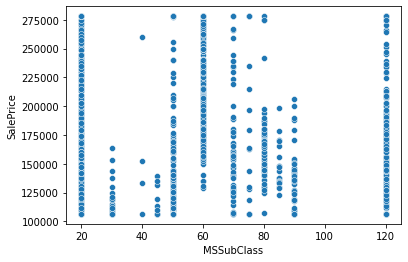

In [85]:
sns.scatterplot(x='MSSubClass',y='SalePrice',data=df_train)

In [86]:
df_train['MSSubClass'].value_counts()

20.0     536
60.0     299
120.0    190
50.0     144
30.0      69
70.0      60
80.0      58
90.0      52
85.0      20
75.0      16
45.0      12
40.0       4
Name: MSSubClass, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


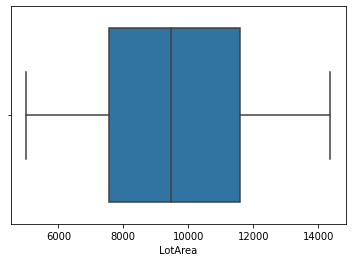

In [87]:
sns.boxplot(df_train['LotArea'])

In [88]:
from scipy import stats

z = np.abs(stats.zscore(df_train[num_clm]))
print(z)

[[1.46312244 0.19868573 0.2861459  ... 1.45692113 0.13877749 0.60515601]
 [1.46312244 0.99139086 0.74690388 ... 0.57448809 0.61443862 0.11633661]
 [1.46312244 0.19868573 0.07953594 ... 1.190378   0.13877749 0.87672234]
 ...
 [1.46330298 0.49620488 0.21727592 ... 0.57448809 1.64520971 1.6552125 ]
 [1.46330298 0.99139086 0.07953594 ... 1.01570461 1.64520971 0.59652501]
 [1.46330298 0.99139086 0.40255395 ... 0.13327157 0.13877749 0.49921374]]


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [89]:
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [90]:
z[1][18]

nan

In [91]:
df_train_outlier = df_train[~((df_train[num_clm]<(q1-1.5*iqr)) | (df_train[num_clm]>(q3+1.5*iqr))).any(axis=1)]

In [92]:
from sklearn.model_selection import train_test_split
X = df_train_outlier[num_clm]
y = df_train_outlier['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ValueError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error

models =[LinearRegression(),Ridge(),Lasso()]
models_name=['LinearRegression','Ridge','Lasso']

for i,model in enumerate(models):
  lr = model
  lr.fit(X_train,y_train)
  prediction = lr.predict(X_test)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_test,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)


In [72]:
q3 = df_train['LotArea'].quantile(0.75)
q1 = df_train['LotArea'].quantile(0.25)
IQR = q3-q1
print(IQR)

4048.0


In [73]:
q_1 = df_train['LotArea'].quantile(0.10)
q_9 = df_train['LotArea'].quantile(0.90)
df_train["LotArea"] = np.where(df_train["LotArea"]<q_1,q_1,df_train["LotArea"])
df_train["LotArea"] = np.where(df_train["LotArea"]>q_9,q_9,df_train["LotArea"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


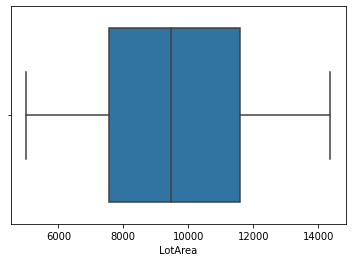

In [74]:
sns.boxplot(df_train['LotArea'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


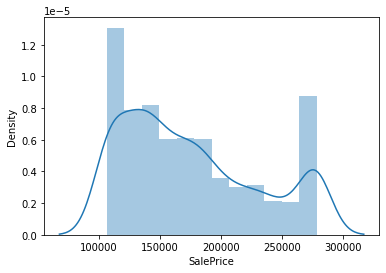

In [55]:
sns.distplot(df_train['SalePrice'])

In [75]:
num_clm

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


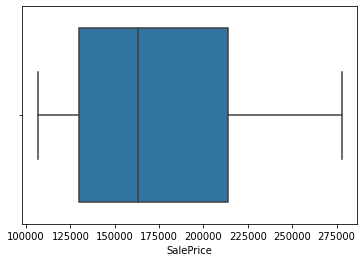

In [76]:
sns.boxplot(df_train['SalePrice'])

In [77]:
df_train['SalePrice'].shape

(1460,)

In [78]:
z = np.abs(stats.zscore(df_train[num_clm]))
print(z)

[[1.46312244 0.19868573 0.2861459  ... 1.45692113 0.13877749 0.60515601]
 [1.46312244 0.99139086 0.74690388 ... 0.57448809 0.61443862 0.11633661]
 [1.46312244 0.19868573 0.07953594 ... 1.190378   0.13877749 0.87672234]
 ...
 [1.46330298 0.49620488 0.21727592 ... 0.57448809 1.64520971 1.6552125 ]
 [1.46330298 0.99139086 0.07953594 ... 1.01570461 1.64520971 0.59652501]
 [1.46330298 0.99139086 0.40255395 ... 0.13327157 0.13877749 0.49921374]]


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [79]:
np.where(z>3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([], dtype=int64), array([], dtype=int64))

In [80]:
X = df_train[num_clm]
y = df_train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [81]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error

models =[LinearRegression(),Ridge(),Lasso()]
models_name=['LinearRegression','Ridge','Lasso']

for i,model in enumerate(models):
  lr = model
  lr.fit(X_train,y_train)
  prediction = lr.predict(X_test)
  mse = mean_squared_error(prediction,y_test)
  score = lr.score(X_test,y_test)
  rmse = np.sqrt(mse)
  print("score of ",models_name[i],': ',score)
  print("meansqureerror of ",models_name[i],':',mse)
  print("root_mean_sqr_error ",models_name[i],':',rmse)

score of  LinearRegression :  1.0
meansqureerror of  LinearRegression : 2.5911376032017253e-21
root_mean_sqr_error  LinearRegression : 5.090321800438284e-11
score of  Ridge :  1.0
meansqureerror of  Ridge : 2.4434791191436076e-15
root_mean_sqr_error  Ridge : 4.943155995053775e-08
score of  Lasso :  0.9999999999966719
meansqureerror of  Lasso : 0.010165568190635058
root_mean_sqr_error  Lasso : 0.1008244424266014


In [82]:
df_train.isnull().sum().sum()

6617

In [65]:
sns.heatmap(df_train.isnull().sum())

IndexError: ignored